In [1]:
import os
import argparse
from collections import OrderedDict as OD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib

parser = argparse.ArgumentParser()
parseGroup1 = parser.add_mutually_exclusive_group(required=True)
parseGroup1.add_argument('--ChunkyDonut',    action='store_true')
parseGroup1.add_argument('--PhiRing',        action='store_true')
parseGroup2 = parser.add_mutually_exclusive_group(required=True)
parseGroup2.add_argument('--l1MatchOffline', action='store_true')
parseGroup2.add_argument('--l1MatchGen',     action='store_true')

runLocally = True

args = None
if not runLocally:
    matplotlib.use('Agg') # use for condor jobs to disable display of plots
    args = parser.parse_args()
else:
    args = parser.parse_args("--ChunkyDonut --l1MatchGen".split()) # to run in jupyter-notebook     
l1Jet_ChunkyDonut = args.ChunkyDonut
l1Jet_PhiRing     = args.PhiRing
l1MatchOffline    = args.l1MatchOffline
l1MatchGen        = args.l1MatchGen

version         = "vtest3" 
sIpFileName     = "../data/L1T_Jet_MLInputs_Run3_QCD_Pt15to7000_PFA1p_CMSSW12_6_0_pre1_nVtxAll_20220925.csv"
sOpFileName_SFs = "../data/L1T_Jet_SFs_Run3_QCD_Pt15to7000_PFA1p_CMSSW12_6_0_pre1_nVtxAll_20220925_%s.csv" % (version)
sOutDir         = "./plots_%s" % (version)

printLevel = 5
iEtaBins = [i for i in range(1, 42) if i!=29]
sL1JetEt_PUS_ChunkyDonut = 'L1JetEt_PUS_ChunkyDonut'
sL1JetEt_PUS_PhiRing     = 'L1JetEt_PUS_PhiRing'
sOfflineJetEt            = 'PFJetEtCorr'
sGenJetEt                = 'GenJetEt'
sL1JetTowerIEtaAbs       = 'L1JetTowerIEtaAbs'
L1JetPtThrsh             = 10.0 # GeV
L1JetPtMax               = 255.0 # GeV

sL1JetEt  = sL1JetEt_PUS_ChunkyDonut if l1Jet_ChunkyDonut else sL1JetEt_PUS_PhiRing
sRefJetEt = sOfflineJetEt if l1MatchOffline else sGenJetEt 

sOpFileName_SFs = sOpFileName_SFs.replace('.csv', '_%s.csv' % (sL1JetEt))
sOutDir = '%s_%s' % (sOutDir, sL1JetEt)


data_all = pd.read_csv(sIpFileName)
print("Input file: %s" % (sIpFileName))
print("iEtaBins ({}): {}".format(len(iEtaBins), iEtaBins))
print("sRefJetEt: {}, \t sL1Jet: {}, \t L1JetPtThrsh: {}".format(sRefJetEt, sL1JetEt, L1JetPtThrsh))
print("l1Jet_ChunkyDonut {}, l1Jet_PhiRing {}, l1MatchOffline {}, l1MatchGen {}".format(
    l1Jet_ChunkyDonut, l1Jet_PhiRing, l1MatchOffline, l1MatchGen))

Input file: ../data/L1T_Jet_MLInputs_Run3_QCD_Pt15to7000_PFA1p_CMSSW12_6_0_pre1_nVtxAll_20220925.csv
iEtaBins (40): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
sRefJetEt: GenJetEt, 	 sL1Jet: L1JetEt_PUS_ChunkyDonut, 	 L1JetPtThrsh: 10.0
l1Jet_ChunkyDonut True, l1Jet_PhiRing False, l1MatchOffline False, l1MatchGen True


In [2]:
data_all.columns

Index(['runNumber', 'lumiSectionNumber', 'eventNumber', 'nVertexReco',
       'GenJetEt', 'nVertexGen', 'nMeanPUGen', 'L1JetType', 'L1JetDefault_Et',
       'L1JetTowerIEtaAbs', 'L1JetDefault_RawEt',
       'L1JetDefault_PUEt_ChunkyDonut', 'L1Jet9x9_RawEt',
       'L1Jet9x9_EtSum7PUTowers', 'L1Jet9x9_PUEt_ChunkyDonut'],
      dtype='object')

/tmp/ipykernel_5215/4130073444.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4,5), layout='constrained')


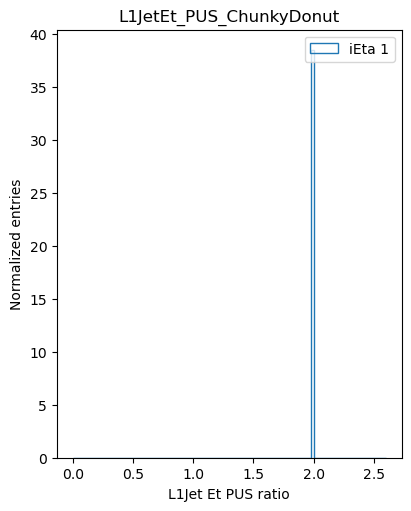

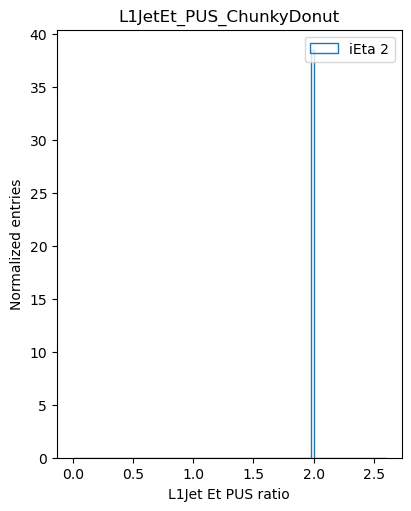

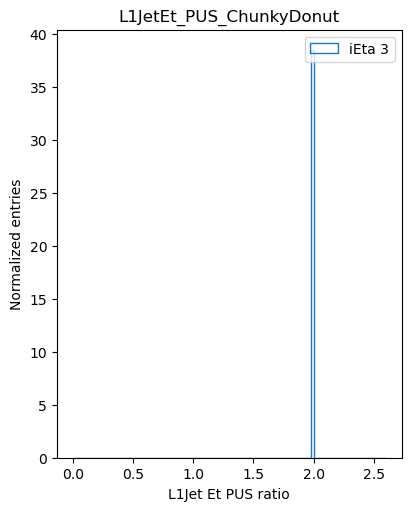

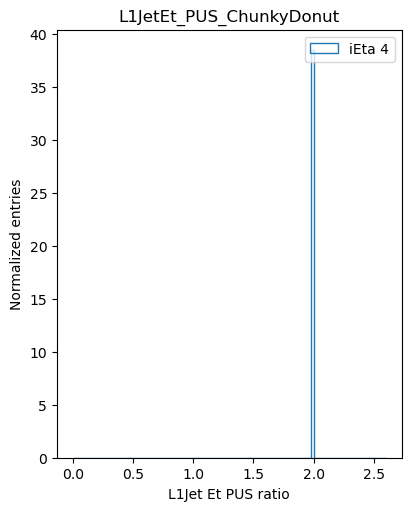

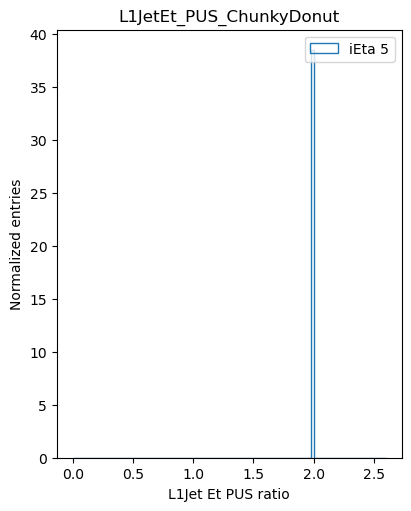

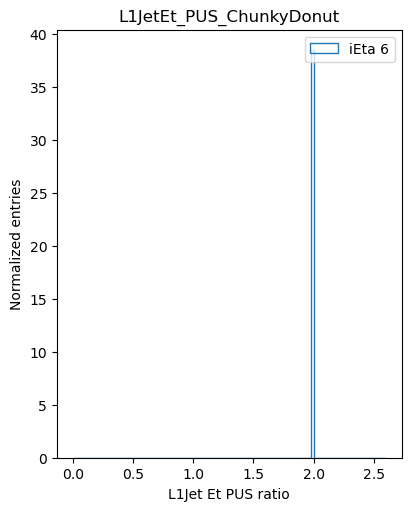

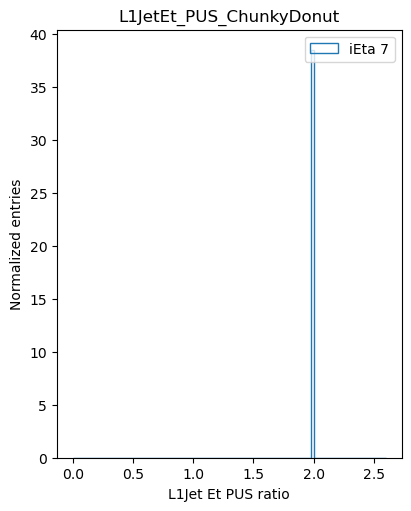

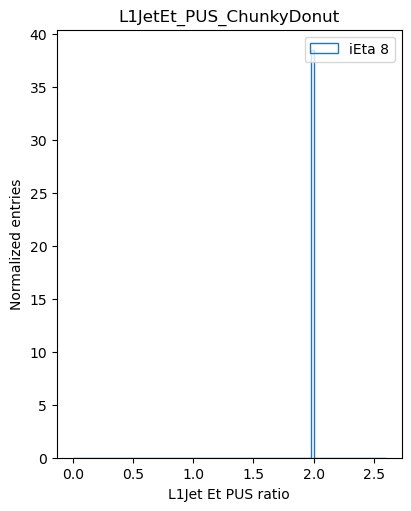

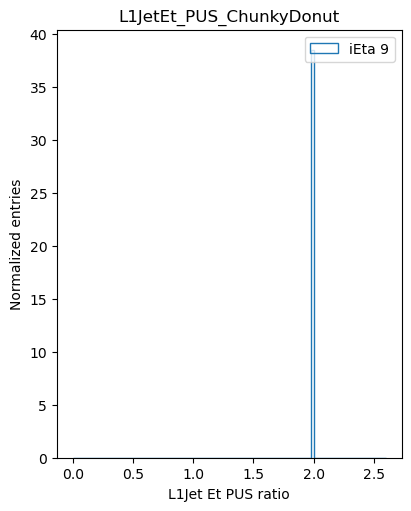

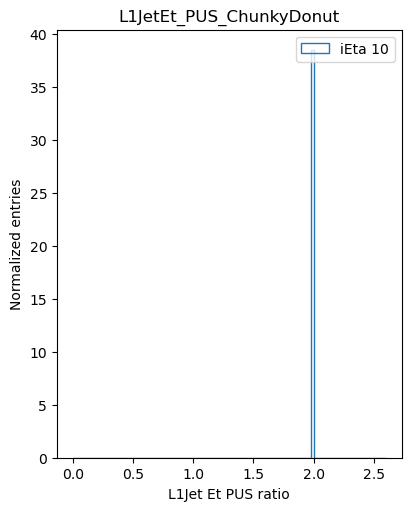

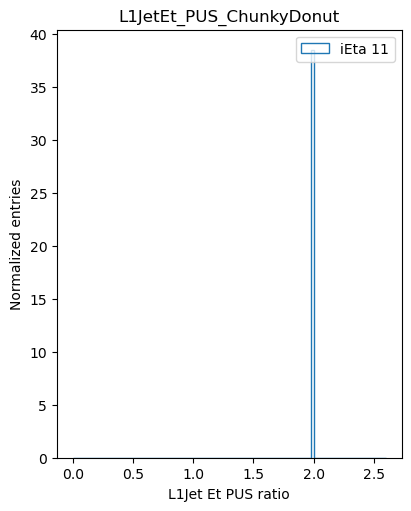

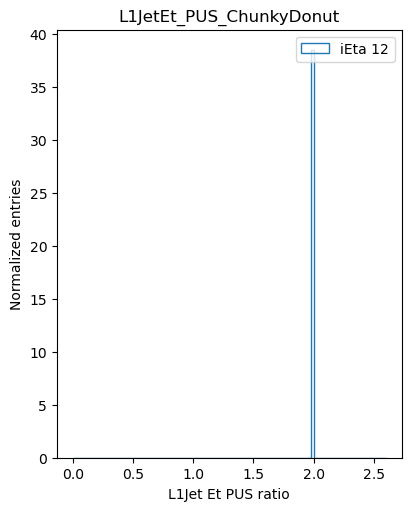

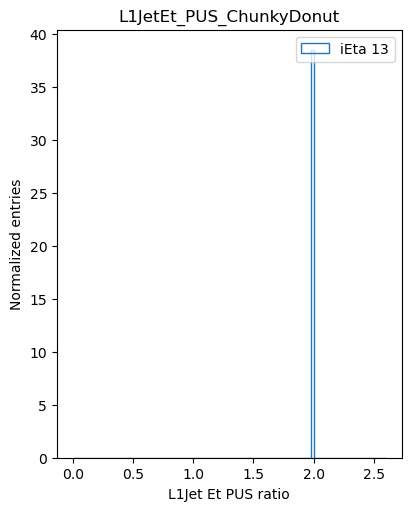

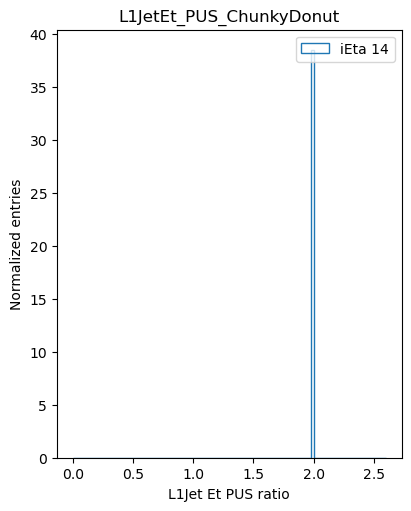

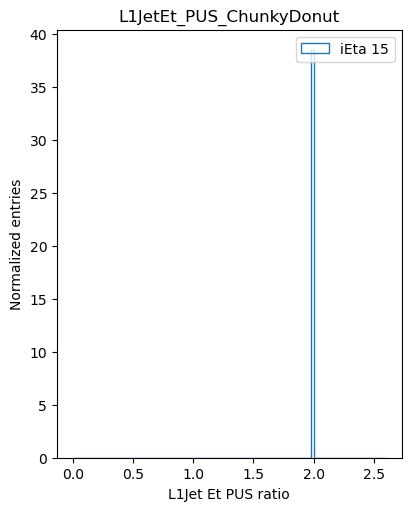

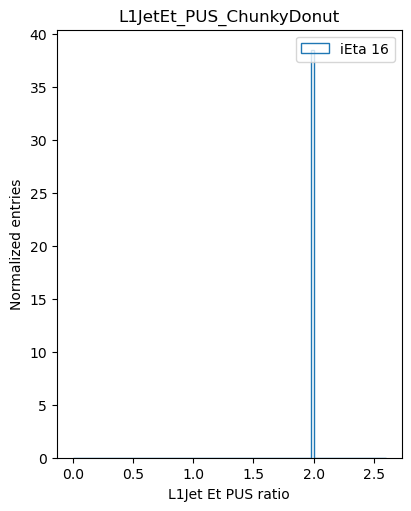

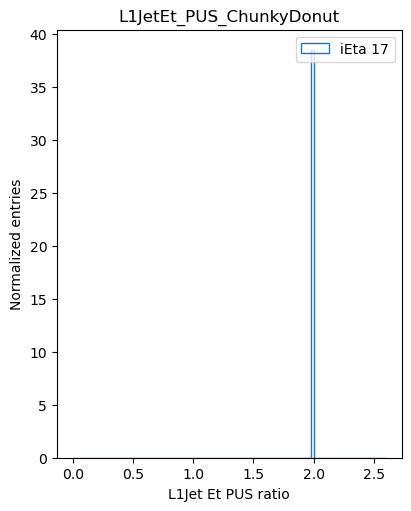

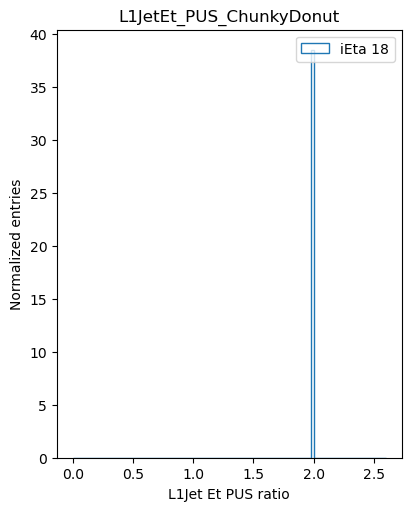

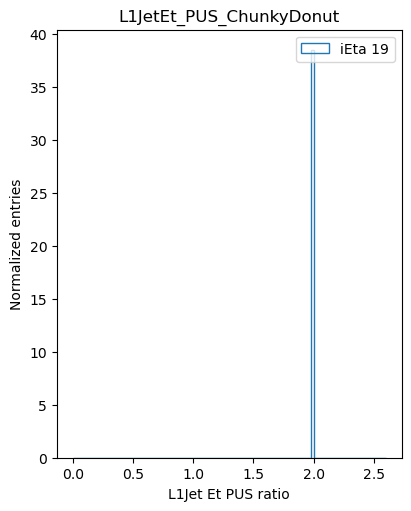

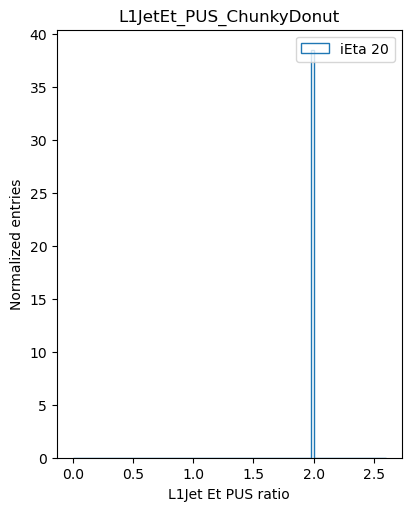

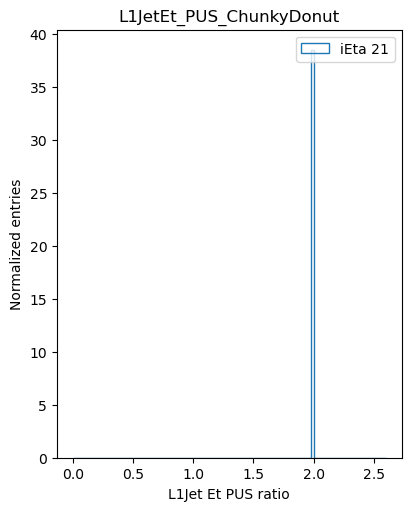

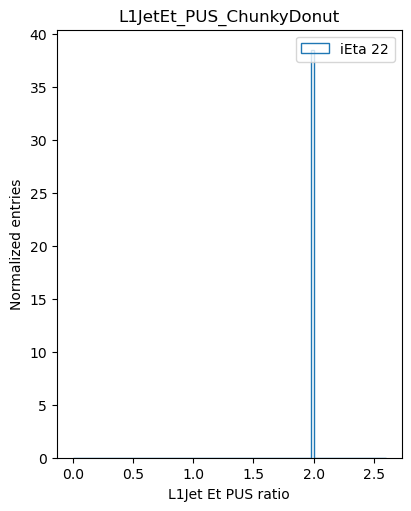

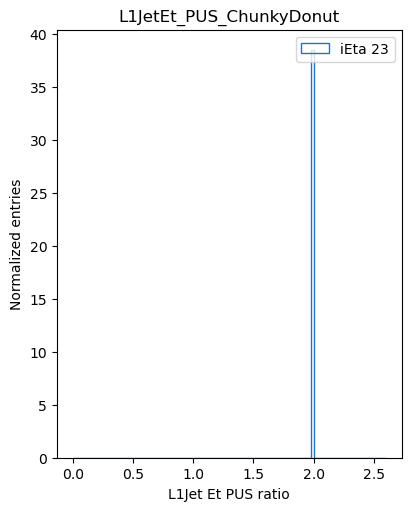

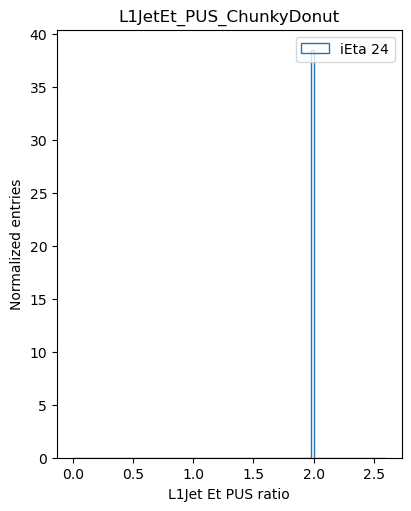

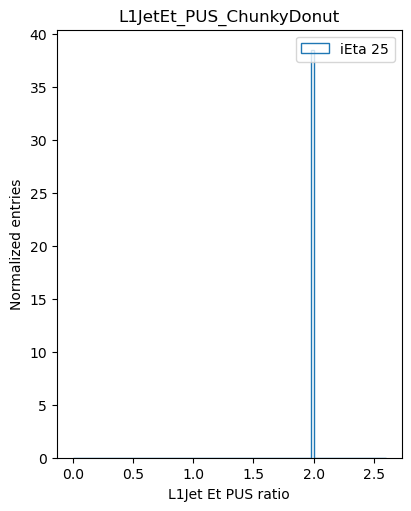

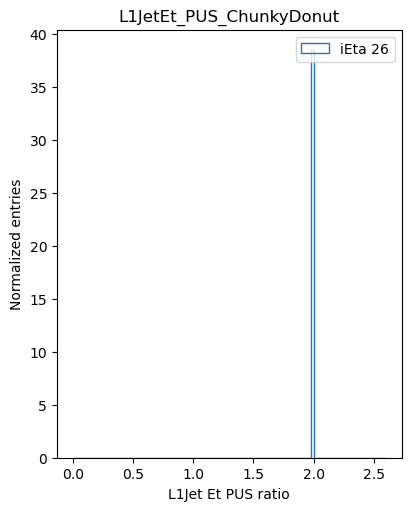

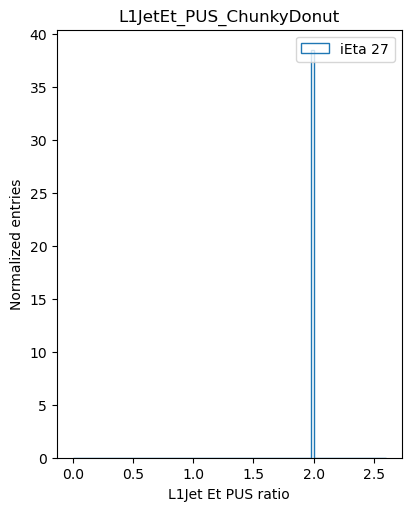

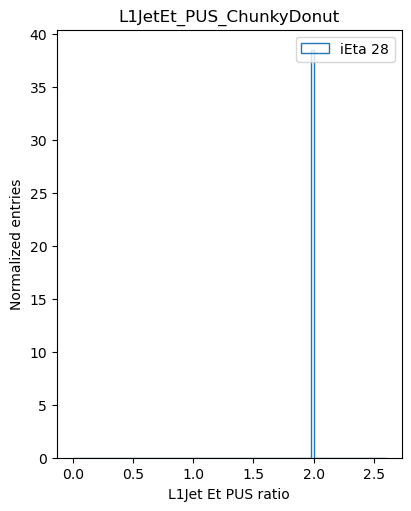

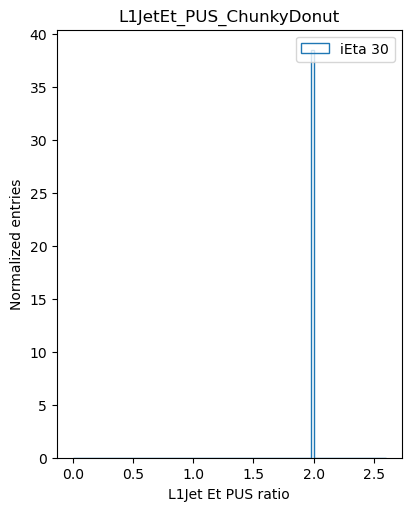

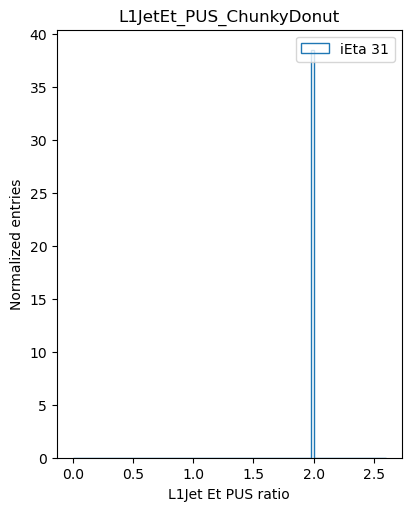

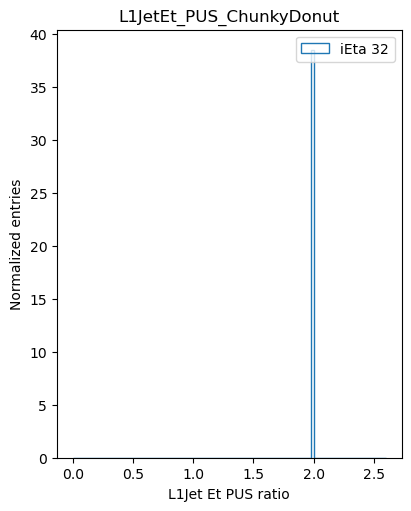

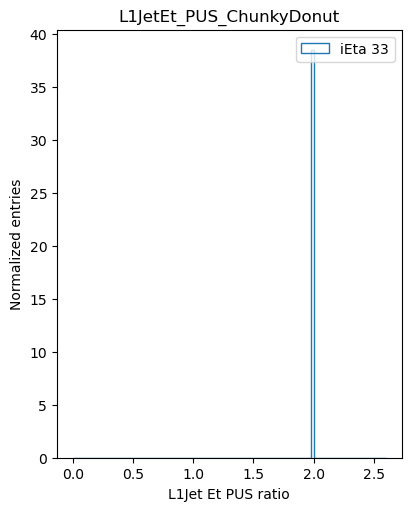

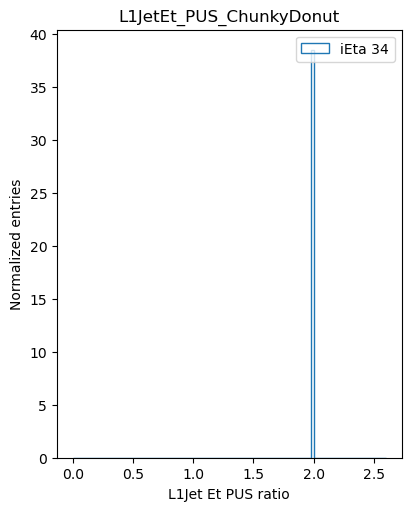

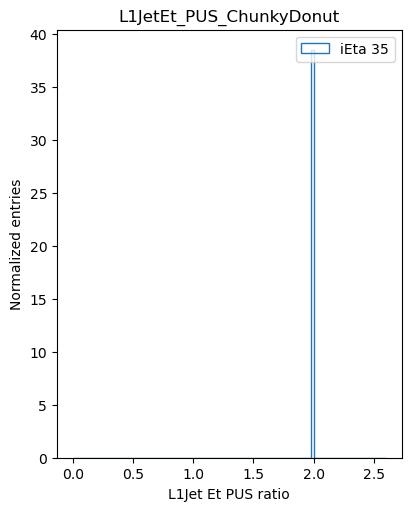

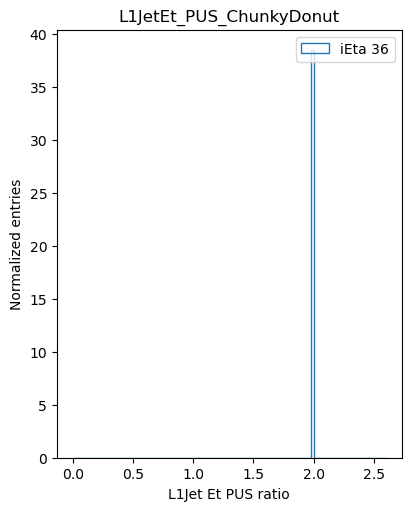

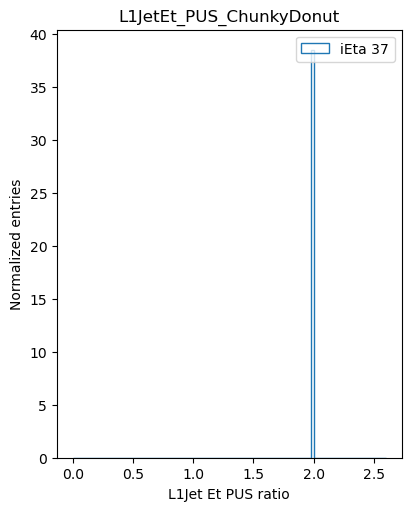

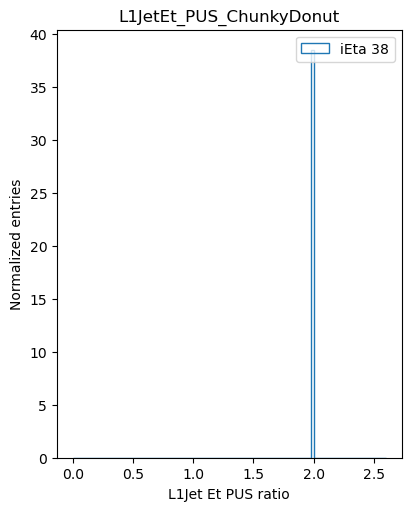

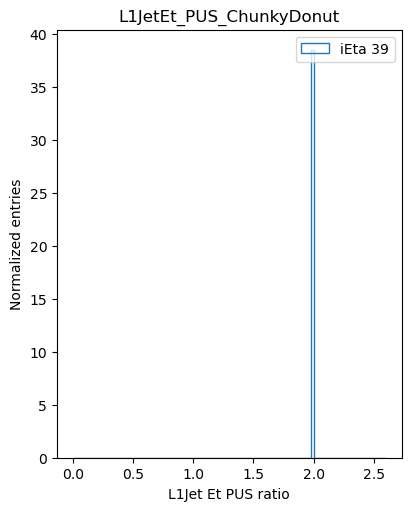

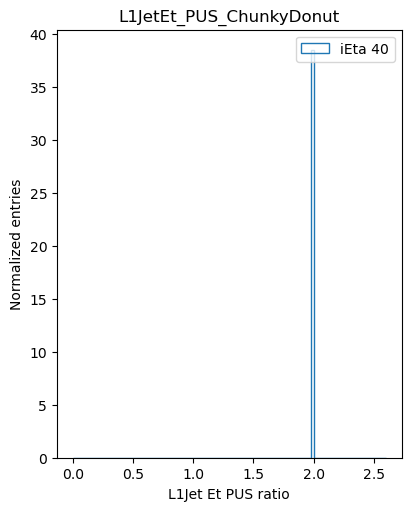

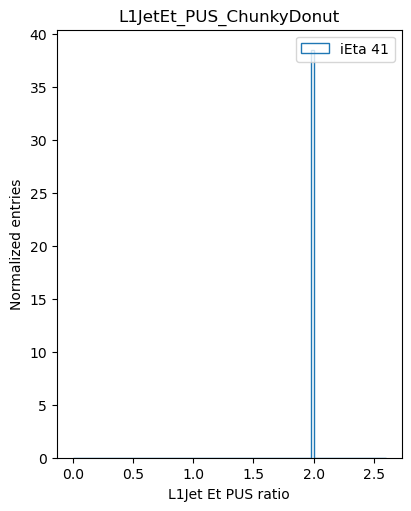

In [5]:
if not os.path.exists(sOutDir): 
    os.makedirs(sOutDir)

for iEtaBin in iEtaBins:
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4,5), layout='constrained')
    
    data_all_iEtaBin = data_all[data_all[sL1JetTowerIEtaAbs] == iEtaBin]
    axs.hist(
            ((data_all_iEtaBin['L1JetDefault_RawEt']-data_all_iEtaBin['L1JetDefault_PUEt_ChunkyDonut'])/(data_all_iEtaBin['L1Jet9x9_RawEt']-data_all_iEtaBin['L1Jet9x9_PUEt_ChunkyDonut'])), 
            bins=100, range=(0, 2.6),
            label='iEta %d' % (iEtaBin),
            histtype='step',#, linewidth=2
            density=True
        )
    axs.set_xlabel('L1Jet Et PUS ratio')
    axs.set_ylabel('Normalized entries')
    axs.set_title('%s' % (sL1JetEt))
    axs.legend()
        
    fig.savefig('%s/L1JetDefaultEtPUS_by_byHand_%s_ieta_%d.png' % (sOutDir, sL1JetEt, iEtaBin))
